<a href="https://colab.research.google.com/github/debstS/London-cycle-rental-analysis/blob/main/Cycle_rental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Collection using Web scraping**

## **Data Collection**


Below is the method followed to scrape the datafiles from the website in this notebook. Let's take a look at understanding each.


## Method Used: Web Scraping csv files from the given path using REQUESTS module

We will begin by downloading the 142 dataset files from 2021 to 2023, starting from the '246JourneyDataExtract30Dec2020-05Jan2021.csv' file, from the TFL website (https://cycling.data.tfl.gov.uk), from usage-stats/ path, till '386JourneyDataExtract15Dec2023-31Dec2023', as this is the final dataset for year 2023.


We will try for web scraping of datatext using pattern search by substring 'JourneyDataExtract' and by using year filter for 2021-2023, using 'requests' library.


To give some context, 'Requests' is a library which helps in accessing selected data from a website, using either public API endpoints made available by the data-owning website, or by using other scraping methods in absence of an API.

In [1]:
import re
import requests
from bs4 import BeautifulSoup
import os

# Logic used in Scraping files: '6-day weekly data' logic

The file URL for downloading the files directly from the TFL server has been constructed using the '6-day weekly data' logic.

The files when observed closely, one can see that they are weekly data (observe the start and end_date in the filename). This can be used to create a logic for constructing a URL for downloading the files directly from the website, which will contain the base url concatenated with filename along with extension. We will use Requests module to hit the URL to send download (POST) request to the website server which will then return the response in form of a downloaded file in designated folder locally.


In [2]:
#### For BATCH 1 of files from '246JourneyDataExtract30Dec2020-05Jan2021' - '333JourneyDataExtract31Aug2022-06Sep2022'

#### BATCH 1 ---####


from datetime import datetime, timedelta

website = 'https://cycling.data.tfl.gov.uk/'

# Base URL of the files
base_url = 'https://cycling.data.tfl.gov.uk/usage-stats/'

# Directory to save downloaded files
target_folder = '/content/sample_data/datasets'
os.makedirs(target_folder, exist_ok=True)

# Given input parameters
start_file_id = 246
end_file_id = 334
day = 30
year = 2020
month = 12
pattern = 'JourneyDataExtract'


# Calculate the start date and end date
start_date = datetime(year, month, day)

def construct_filename(base_url, target_folder, start_file_id, end_file_id, start_date, pattern):
  file_count=0
  #filenames = []
  while start_file_id != end_file_id:

    end_date = start_date + timedelta(days=6)

    # Format the dates
    start_date_str = start_date.strftime('%d%b%Y')  # Format as DDMonYYYY
    end_date_str = end_date.strftime('%d%b%Y')      # Format as DDMonYYYY

    # Construct the filename
    filename = f"{start_file_id}{pattern}{start_date_str}-{end_date_str}.csv"


    #Reset start_date for next file
    start_date = end_date + timedelta(days=1)

    # Increment the file_id and file_count
    start_file_id += 1  # This step ensures file_id becomes 359
    file_count += 1

  #   print(filename)
  # print(file_count)

    #construct the URL to download the files using FILENAME -
    file_url = base_url + filename
    file_path = os.path.join(target_folder, filename)
    response = requests.head(file_url)
    if response.status_code == 200:
        print(f"Downloading {file_url}...")
        with requests.get(file_url, stream=True) as r:
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
        print(f"Downloaded {filename}")
  return file_count



# Print the result
result = construct_filename(base_url, target_folder, start_file_id, end_file_id, start_date, pattern)
print(f'\n{result} files download completed from {website}.')


Downloaded 246JourneyDataExtract30Dec2020-05Jan2021.csv
Downloaded 247JourneyDataExtract06Jan2021-12Jan2021.csv
Downloaded 248JourneyDataExtract13Jan2021-19Jan2021.csv
Downloaded 249JourneyDataExtract20Jan2021-26Jan2021.csv
Downloaded 250JourneyDataExtract27Jan2021-02Feb2021.csv
Downloaded 251JourneyDataExtract03Feb2021-09Feb2021.csv
Downloaded 252JourneyDataExtract10Feb2021-16Feb2021.csv
Downloaded 253JourneyDataExtract17Feb2021-23Feb2021.csv
Downloaded 254JourneyDataExtract24Feb2021-02Mar2021.csv
Downloaded 255JourneyDataExtract03Mar2021-09Mar2021.csv
Downloaded 256JourneyDataExtract10Mar2021-16Mar2021.csv
Downloaded 257JourneyDataExtract17Mar2021-23Mar2021.csv
Downloaded 258JourneyDataExtract24Mar2021-30Mar2021.csv
Downloaded 259JourneyDataExtract31Mar2021-06Apr2021.csv
Downloaded 260JourneyDataExtract07Apr2021-13Apr2021.csv
Downloaded 261JourneyDataExtract14Apr2021-20Apr2021.csv
Downloaded 262JourneyDataExtract21Apr2021-27Apr2021.csv
Downloaded 263JourneyDataExtract28Apr2021-04May2

In [3]:
# For the BATCH 2 of files (file id -> 335 - 374JourneyDataExtract12Jun2023-18Jun2023.csv (file id 334 is an anomaly with only 4 days of data so we will skip it))

#### BATCH 2---####

###WORKING CODE for constructing FILENAME

from datetime import datetime, timedelta

website = 'https://cycling.data.tfl.gov.uk/'

# Base URL of the files
base_url = 'https://cycling.data.tfl.gov.uk/usage-stats/'

# Directory to save downloaded files
target_folder = '/content/sample_data/datasets'
os.makedirs(target_folder, exist_ok=True)

# Given input parameters
start_file_id = 335
end_file_id = 375
day = 12
year = 2022
month = 9
pattern = 'JourneyDataExtract'


# Calculate the start date and end date
start_date = datetime(year, month, day)

def construct_filename(base_url, target_folder, start_file_id, end_file_id, start_date, pattern):
  file_count=0
  #filenames = []
  while start_file_id != end_file_id:

    end_date = start_date + timedelta(days=6)

    # Format the dates
    start_date_str = start_date.strftime('%d%b%Y')  # Format as DDMonYYYY
    end_date_str = end_date.strftime('%d%b%Y')      # Format as DDMonYYYY

    # Construct the filename
    filename = f"{start_file_id}{pattern}{start_date_str}-{end_date_str}.csv"
    #filenames = filenames.append(filename)

    #Reset start_date for next file
    start_date = end_date + timedelta(days=1)

    # Increment the file_id and file_count
    start_file_id += 1  # This step ensures file_id becomes 359
    file_count += 1

  #   print(filename)
  # print(file_count)

    #construct the URL to download the files using FILENAME -
    file_url = base_url + filename
    file_path = os.path.join(target_folder, filename)
    response = requests.head(file_url)
    if response.status_code == 200:
        print(f"Downloading {file_url}...")
        with requests.get(file_url, stream=True) as r:
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
        print(f"Downloaded {filename}")
  return file_count



# Print the result
result = construct_filename(base_url, target_folder, start_file_id, end_file_id, start_date, pattern)
print(f'\n{result} files download completed from {website}.')


Downloaded 335JourneyDataExtract12Sep2022-18Sep2022.csv
Downloaded 336JourneyDataExtract19Sep2022-25Sep2022.csv
Downloaded 337JourneyDataExtract26Sep2022-02Oct2022.csv
Downloaded 338JourneyDataExtract03Oct2022-09Oct2022.csv
Downloaded 339JourneyDataExtract10Oct2022-16Oct2022.csv
Downloaded 340JourneyDataExtract17Oct2022-23Oct2022.csv
Downloaded 341JourneyDataExtract24Oct2022-30Oct2022.csv
Downloaded 342JourneyDataExtract31Oct2022-06Nov2022.csv
Downloaded 343JourneyDataExtract07Nov2022-13Nov2022.csv
Downloaded 344JourneyDataExtract14Nov2022-20Nov2022.csv
Downloaded 345JourneyDataExtract21Nov2022-27Nov2022.csv
Downloaded 346JourneyDataExtract28Nov2022-04Dec2022.csv
Downloaded 347JourneyDataExtract05Dec2022-11Dec2022.csv
Downloaded 348JourneyDataExtract12Dec2022-18Dec2022.csv
Downloaded 349JourneyDataExtract19Dec2022-25Dec2022.csv
Downloaded 350JourneyDataExtract26Dec2022-01Jan2023.csv
Downloaded 351JourneyDataExtract02Jan2023-08Jan2023.csv
Downloaded 352JourneyDataExtract09Jan2023-15Jan2

In [4]:
# For Batch 3 of files (from file id 375 - 386JourneyDataExtract15Dec2023-31Dec2023.csv (Follows the dataname logic as from- Day 1-14 and 15-end of month))

#### BATCH 3---####

###WORKING CODE for constructing FILENAME

from datetime import datetime, timedelta

website = 'https://cycling.data.tfl.gov.uk/'

# Base URL of the files
base_url = 'https://cycling.data.tfl.gov.uk/usage-stats/'

# Directory to save downloaded files
target_folder = '/content/sample_data/datasets'
os.makedirs(target_folder, exist_ok=True)

# Given input parameters
start_file_id = 375
end_file_id = 386
day = 19
year = 2023
month = 6
pattern = 'JourneyDataExtract'


# Calculate the start date and end date
start_date = datetime(year, month, day)


#Function to construct filename as per date logic

def construct_filename(base_url, target_folder, start_file_id, end_file_id, start_date, pattern):
  file_count=0

  while start_file_id <= end_file_id: #to fetch until last data of 2023 which is file - 386JourneyDataExtract15Dec2023-31Dec2023.csv
    if start_date.day != 1 :  #logic is if start_date is 1, end_date is 13 days from 1, otherwise from construct date from start_date till end of current month, as that's the logic on the website for files from 375JourneyDataExtract19Jun2023-30Jun2023.csv until end of 2023

      # getting next month
      # using replace to get to last day + offset
      # to reach next month
      nxt_mnth = start_date.replace(day=28) + timedelta(days=4)

      # subtracting the days from next month date to
      # get last date of current Month
      end_date = nxt_mnth - timedelta(days=nxt_mnth.day)


    else: end_date = start_date + timedelta(days=13)

    # Format the dates
    start_date_str = start_date.strftime('%d%b%Y')  # Format as DDMonYYYY
    end_date_str = end_date.strftime('%d%b%Y')      # Format as DDMonYYYY

    # Construct the filename
    filename = f"{start_file_id}{pattern}{start_date_str}-{end_date_str}.csv"
    #filenames = filenames.append(filename)

    #Reset start_date for next file
    start_date = end_date + timedelta(days=1)

    # Increment the file_id and file_count
    start_file_id += 1




    #construct the URL to download the files using FILENAME -
    file_url = base_url + filename
    file_path = os.path.join(target_folder, filename)
    response = requests.head(file_url)
    if response.status_code == 200:
        print(f"Downloading {file_url}...")
        with requests.get(file_url, stream=True) as r:
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
        print(f"Downloaded {filename}")
        file_count += 1
  return file_count



# Print the result
result = construct_filename(base_url, target_folder, start_file_id, end_file_id, start_date, pattern)
print(f'\n{result} files download completed from {website}.')


Downloaded 375JourneyDataExtract19Jun2023-30Jun2023.csv
Downloaded 376JourneyDataExtract01Jul2023-14Jul2023.csv
Downloaded 377JourneyDataExtract15Jul2023-31Jul2023.csv
Downloaded 378JourneyDataExtract01Aug2023-14Aug2023.csv

4 files download completed from https://cycling.data.tfl.gov.uk/.


# Import all relevant libraries

We will start with importing all relevant libraries-

Pandas - both for mathematical computations and for data analysis for any Data Science project.

Glob - It is used to search huge no of CSV files and for text in files

In [5]:
import pandas as pd
import glob
import multiprocessing
import os
import re

In [6]:
#setting current working directory

os.chdir("/content/sample_data/datasets")


#**Data Pre-processing and cleaning**

In the below code, 'Multiprocessing' module is used to leverage parallel processing to read and process CSV files concurrently as it was taking long time to exceute the operations of reading the csv files as dataframes into a list, renaming the columns, and then concatenating all dataframes into a single dataset.

This code will utilize multiple CPU cores to read and process CSV files concurrently, thus improving the overall performance.


In [7]:
import pandas as pd
import glob

# Define the column rename mapping
column_rename_mapping = {
    'Rental Id': 'Number',
    'Duration': 'Total duration (s)',
    'Bike Id': 'Bike number',
    'End Date': 'End date',
    'EndStation Id': 'End station number',
    'EndStation Name': 'End station',
    'Start Date': 'Start date',
    'StartStation Id': 'Start station number',
    'StartStation Name': 'Start station'

}

def load_and_process_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, low_memory=False)

    # Renaming the columns
    df.rename(columns=column_rename_mapping, inplace=True)


    return df

# List of file paths (as they are named 246_..csv, 247__..csv,....378_...csv)
csv_files = glob.glob('*.csv')


# Sort the list of CSV files based on numeric values in the filename
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

csv_files.sort(key=extract_number)


# Read each CSV file using multiprocessing and store them in a list
dataframes = []
pool = multiprocessing.Pool()  # Create a multiprocessing pool

try:
    dataframes = pool.map(load_and_process_csv, csv_files)  # Apply the function to each file in parallel
finally:
    pool.close()
    pool.join()




In [8]:
#check how many files, it should be 132

len(dataframes)


132

# IMPORTANT: Observation about the data- the 'OLDER' and 'NEWER' files

**NOTE - important thing to note here is that from file id '335JourneyDataExtract12Sep2022-18Sep2022' onwards, all the datafiles on the website till '386JourneyDataExtract15Dec2023-31Dec2023' (this is the last file for year 2023) contains 2 extra columns (Bike Model, Total Duration (ms)), and also have different order and naming conventions for some of the columns from  previous datafiles.**


We have to ensure we take this factor into account in the data pre-prococessing phase, when we merge all the datasets to obtain a single source of data to carry on with further analysis.

This is the reason that we will be referring constantly to the files before filename **'335JourneyDataExtract12Sep2022-18Sep2022**' as  **'OLDER'** files, and those later than '335JourneyDataExtract12Sep2022-18Sep202' as **'NEWER'** files throughout this notebook from now onwards.


**FIY-once we make a list of all 132 datafiles named 'dataframes', dataframes[0:87] contains the OLDER files, and dataframes[88:131] contain the NEWER datafiles.**



## SAMPLING the data

The dataset is too large to handle, so due to lack of computational resources, we will just take a random sample of the dataset.

We will randomly sample 10000 rows from each dataframe to form a list of sampled dataframes called 'sampled_df_list'

In [9]:
import random

# Define the number of samples we want to select
num_samples = 10000  #sample these many records from each dataframe within 'dataframes'

# Randomly sample the dataframes
sampled_df_list = []
for i in range(len(dataframes)):
  df = dataframes[i]
  sampled_dataframes = df.sample(n=num_samples)
  sampled_df_list.append(sampled_dataframes)


In [10]:
# Now `sampled_df_list` contains a random subset of the original list of dataframes
rows=0
for i, df in enumerate(sampled_df_list):
  rows = rows + df.shape[0]
  #print(f"Sampled DataFrame {i+1}:\n", df)
print(f'Total no of rows: {rows}')

Total no of rows: 1320000


So now we have a sample subset of dataframes, with total 1.3 Million records. We can proceed with pre-processing them.

In [11]:
# Convert datatypes
for i in range(len(sampled_df_list)):
    df = sampled_df_list[i]


    # Convert data types
    conversions = {
        'Number': int,
        'Total duration (s)': float,
        'Bike number': int,
        'End station number': str, #we will convert this into 'Int64' in later steps, as it has a value '300006-1' which is inconsistent with Int64 type
        'End station': str,
        'Start station number': str, #we will convert this into 'Int64' in later steps, as it has a value '300006-1' which is inconsistent with Int64 type
        'Start station': str,
        'Bike model': str,
        'Total duration (ms)': float
    }

    date_columns = ['End date', 'Start date']
    date_formats = ['%d/%m/%Y %H:%M', '%Y-%m-%d %H:%M:%S', '%d-%m-%Y %H:%M:%S']

    for col, dtype in conversions.items():
        if col in df.columns:
            if dtype == 'int':
                df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
            else:
                df[col] = df[col].astype(dtype)

    for date_col in date_columns:
        if date_col in df.columns:
            for fmt in date_formats:
                try:
                    df[date_col] = pd.to_datetime(df[date_col], format=fmt, errors='raise')
                    df[date_col] = df[date_col].dt.strftime('%d/%m/%Y %H:%M')
                    break
                except ValueError:
                    continue
            else:
                # If all formats fail, set errors to NaT (Not a Time)
                df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
                df[date_col] = df[date_col].dt.strftime('%d/%m/%Y %H:%M')



In [12]:
#view all datatypes for all dataframes

sampled_df_list[10].head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station
56547,105950073,1440.0,10380,11/03/2021 11:03,203,"West Smithfield Rotunda, Farringdon",11/03/2021 10:39,419,"Chelsea Bridge, Pimlico"
94563,106052214,180.0,10228,16/03/2021 11:01,196,"Union Street, The Borough",16/03/2021 10:58,295,"Swan Street, The Borough"
64202,105978720,780.0,8082,12/03/2021 18:55,685,"Osiers Road, Wandsworth",12/03/2021 18:42,711,"Everington Street, Fulham"
68547,106062343,960.0,13073,16/03/2021 18:42,545,"Arlington Road, Camden Town",16/03/2021 18:26,159,"Great Marlborough Street, Soho"
103498,105977921,420.0,9299,12/03/2021 18:24,345,"Flood Street, Chelsea",12/03/2021 18:17,219,"Bramham Gardens, Earl's Court"


It was observed from analysis that some rows contain non-integer values for columns 'Start station number' and 'End station number'.

To avoid this possibility, we will convert the columns into 'Int64' in next steps, after cleaning up values like- '300006-1' which is inconsistent with Int64 type. We will remove the '-1' bit and just keep the digits before that.

In [13]:
# Function to clean and convert station number columns to int
def clean_and_convert(column):
    # Use vectorized string operations for efficiency
    numeric_part = column.str.extract(r'(\d+)')[0]
    return pd.to_numeric(numeric_part, errors='coerce')


# Cleaning 'End station number' and 'Start station number'
for i in range(len(sampled_df_list)):
    df = sampled_df_list[i]

    # Cleaning and converting station number columns
    if 'End station number' in df.columns:
        df['End station number'] = clean_and_convert(df['End station number'])
    if 'Start station number' in df.columns:
        df['Start station number'] = clean_and_convert(df['Start station number'])

    # Convert data types
    conversions = {
        'End station number': 'int64',
        'Start station number': 'int64'

    }

    for col, dtype in conversions.items():
        if col in df.columns:
            if dtype == 'int64':
                df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
            else:
                df[col] = df[col].astype(dtype)





Checking in below code if the datatype conversion from object to Int64 was successful or not for station number columns in all the dataframes.

In [14]:
# #view all datatypes for all dataframes

for i in range(len(sampled_df_list)):
    df = sampled_df_list[i]
    print(f'df{i} dtypes')
    print('\n')
    print(df.dtypes)
    print('\n')


# ## below to view if any station number columns are still not converted to Int64 datatype
# c,s=0,0
# for i in range(len(sampled_df_list)):
#     df = sampled_df_list[i]
#     #print(df['End station number'].dtype)
#     if df['End station number'].dtype!= 'Int64':
#       c+=1
#       print(df.dtypes)
#     if (df['Start station number'].dtype!= 'Int64'):
#       s+=1
#       print(df.dtypes)
# print(f"Total {c} and {s} dataframes with invalid datatype for 'End station number' and 'Start station number'")

df0 dtypes


Number                    int64
Total duration (s)      float64
Bike number               int64
End date                 object
End station number        Int64
End station              object
Start date               object
Start station number      Int64
Start station            object
dtype: object


df1 dtypes


Number                    int64
Total duration (s)      float64
Bike number               int64
End date                 object
End station number        Int64
End station              object
Start date               object
Start station number      Int64
Start station            object
dtype: object


df2 dtypes


Number                    int64
Total duration (s)      float64
Bike number               int64
End date                 object
End station number        Int64
End station              object
Start date               object
Start station number      Int64
Start station            object
dtype: object


df3 dtypes


Number                    int64
Tota

In [15]:
sampled_df_list[100].dtypes

Number                    int64
Start date               object
Start station number      Int64
Start station            object
End date                 object
End station number        Int64
End station              object
Bike number               int64
Bike model               object
Total duration           object
Total duration (ms)     float64
dtype: object

In [16]:
#view all datatypes for OLDER dataframes (Note- OLDER = dataframe[0:87], NEWER = dataframes[88:131])
len(sampled_df_list)

132

In [17]:
# To find which columns in the dataframes have records with value '300006-1'
c=0
for i in range(len(sampled_df_list)):
  df = sampled_df_list[i]
  print(df[df.columns[df.isin(['300006-1']).any()]])  # this filter is to check if any column contain the value '300006-1'
  print(f'df{i}')
  c+=1
print(f'There are total {c} such records')


Empty DataFrame
Columns: []
Index: [78345, 61391, 54113, 45148, 22199, 57120, 27447, 22848, 40406, 39171, 9710, 62552, 76712, 27587, 41050, 24978, 31247, 69548, 84171, 22207, 75446, 19053, 26371, 44575, 68104, 64632, 14745, 29271, 81532, 19988, 67228, 88127, 70713, 19806, 86474, 78839, 73480, 46575, 16122, 10488, 28813, 84948, 35407, 5257, 41679, 8701, 74990, 92476, 42363, 74892, 82316, 31034, 31062, 47542, 73060, 53439, 6002, 4999, 29474, 86235, 79027, 19547, 37115, 69801, 3088, 1368, 89861, 17277, 88143, 56666, 43349, 53539, 57098, 51529, 12938, 81305, 63700, 80646, 33003, 52992, 43258, 86445, 40039, 47734, 17152, 41846, 90344, 90042, 16481, 81834, 64144, 74064, 65561, 52886, 49843, 67648, 87270, 11989, 4522, 39958, ...]

[10000 rows x 0 columns]
df0
Empty DataFrame
Columns: []
Index: [73064, 14756, 89448, 25711, 80077, 72517, 11723, 46479, 92067, 10423, 89682, 73519, 33676, 79638, 75695, 24204, 59661, 34484, 65185, 71061, 6929, 66783, 88651, 62921, 84846, 34897, 68364, 35733, 5586, 

In [18]:
#to view how many data rows have values for 'Start station number' and 'End station number' as '300006-1'

# for i in range (len(dataframes)):
#   if i==92:
#     df = dataframes[i]
#     print(df[df['End station number']=='300006-1'])
#     print(df[df['Start station number']=='300006-1'])

#A sample data field with value '300006-1'
for i in range (len(sampled_df_list)):
  if i==92:
    df = sampled_df_list[i]
    print(df[df['End station number']=='300006-1'])
    print(df[df['Start station number']=='300006-1'])

#to count how man data rows have values for 'Start station number' and 'End station number' as '300006-1'

# for i in range (len(sampled_df_list)):
#   df = sampled_df_list[i]
#   if df.isin(['300006-1']).any():
#     print('End no')#(df[df['End station number']=='300006-1'].count())
#   if df['Start station number'].any():
#     print('Start no')#print(df[df['Start station number']=='300006-1'].count())

Empty DataFrame
Columns: [Number, Start date, Start station number, Start station, End date, End station number, End station, Bike number, Bike model, Total duration, Total duration (ms)]
Index: []
Empty DataFrame
Columns: [Number, Start date, Start station number, Start station, End date, End station number, End station, Bike number, Bike model, Total duration, Total duration (ms)]
Index: []


# CONCAT all the dataframes into ONE large dataframe for further analysis.

We have taken care of the column datatypes formatting in the above steps for all dataframes.

We are good to proceed with concatenating all the dataframes for further Exploratory Data Analysis. As pandas.concat() concatenates on basis of same name columns, the columns which don't match will be added vertically to the final dataframe in the end.

In [19]:
# Optionally, concatenate all DataFrames into a single DataFrame
combined_cycle_rental_df = pd.concat(sampled_df_list, ignore_index=True)

# Checking the data types of the concatenated DataFrame
print(combined_cycle_rental_df.dtypes)

Number                    int64
Total duration (s)      float64
Bike number               int64
End date                 object
End station number        Int64
End station              object
Start date               object
Start station number      Int64
Start station            object
Bike model               object
Total duration           object
Total duration (ms)     float64
dtype: object


In the above steps, one can see that the 'date' columns are objects. We will format them later in the notebook.

In [43]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Total duration,Total duration (ms)
0,104808466,1620.0,17711,02/01/2021 18:12,457,"Castlehaven Road, Camden Town",02/01/2021 17:45,394,"Aberdeen Place, St. John's Wood",NaN,NaN,NaN
1,104799527,4680.0,11713,02/01/2021 15:01,365,"City Road, Angel",02/01/2021 13:43,365,"City Road, Angel",NaN,NaN,NaN
2,104755120,1500.0,17892,30/12/2020 14:02,574,"Eagle Wharf Road, Hoxton",30/12/2020 13:37,553,"Regent's Row , Haggerston",NaN,NaN,NaN
3,104796490,420.0,15035,02/01/2021 12:29,39,"Shoreditch High Street, Shoreditch",02/01/2021 12:22,749,"Haggerston Road, Haggerston",NaN,NaN,NaN
4,104787428,240.0,15279,01/01/2021 14:20,133,"Derry Street, Kensington",01/01/2021 14:16,398,"Holland Park, Kensington",NaN,NaN,NaN


From above result, we can see that we have 3 duration columns - 'Total duration (s)', 'Total duration' and 'Total duration (ms)'.

The OLDER files had 'Duration' which has been renamed as 'Total duration (s) in the data loading step, whereas the NEWER files had two extra columns containing duration in SECONDS and Milliseconds.


We will use the 'Total duration (ms)' column to extract duration in SECONDS later, so we will drop the 'Total duration' column from the datafiles containing it as its redundant.

In [20]:
#Volume of the data
combined_cycle_rental_df.shape

(1320000, 12)

In the Dataype conversion step earlier in the notebook, the challenge was to format all the datatypes to expected types. The date columns were particularly challenging as some files are in format '2020/30/12 13:20', while some were in string ('2020-23-20'), etc.

In [21]:
#Extracting 'Total duration (s)' from 'Total duration (ms)' for columns which have 'Total duration (s)' as NaN
combined_cycle_rental_df['Total duration (ms)'] = combined_cycle_rental_df['Total duration (ms)'] / 1000  #converting milliseconds into seconds


In [22]:
# To check conversion done or not for NEWER files
combined_cycle_rental_df.tail()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Total duration,Total duration (ms)
1319995,133090413,NaN,55087,11/08/2023 12:11,1147,"Clifton Road, Maida Vale",11/08/2023 12:04,1147,"Clifton Road, Maida Vale",CLASSIC,7m 35s,455.703
1319996,132985634,NaN,56679,07/08/2023 18:16,2587,"Wormwood Street, Liverpool Street",07/08/2023 17:54,2666,"Howick Place, Westminster",CLASSIC,21m 57s,1317.851
1319997,133048092,NaN,50062,09/08/2023 21:53,1213,"Curlew Street, Shad Thames",09/08/2023 21:38,1073,"Kennington Road Post Office, Oval",CLASSIC,15m 7s,907.232
1319998,133158569,NaN,57465,14/08/2023 10:16,1035,"Boston Place, Marylebone",14/08/2023 10:02,200145,"Gloucester Avenue, Camden Town",CLASSIC,14m 0s,840.938
1319999,132878191,NaN,51375,03/08/2023 06:15,300101,"Little Brook Green, Brook Green",03/08/2023 06:09,300088,"Queensdale Road, Shepherd's Bush",CLASSIC,6m 24s,384.127


In [23]:
#dropping the 'Total duration' columns as its redundant, once we have converted the milliseconds column in seconds in above steps

combined_cycle_rental_df.drop(['Total duration'], axis=1, inplace=True)
combined_cycle_rental_df.shape

(1320000, 11)

In [24]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Total duration (ms)
0,104845857,240.0,16061,05/01/2021 21:56,747,"Ormonde Gate, Chelsea",05/01/2021 21:52,5,"Sedding Street, Sloane Square",NaN,NaN
1,104766166,1860.0,16293,31/12/2020 01:23,221,"Horseferry Road, Westminster",31/12/2020 00:52,811,"Westferry Circus, Canary Wharf",NaN,NaN
2,104825007,900.0,17264,03/01/2021 21:13,598,"Southerton Road, Hammersmith",03/01/2021 20:58,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN,NaN
3,104749300,360.0,18120,30/12/2020 08:55,201,"Dorset Square, Marylebone",30/12/2020 08:49,255,"Clifton Road, Maida Vale",NaN,NaN
4,104789206,1320.0,16336,01/01/2021 15:58,303,"Albert Gate, Hyde Park",01/01/2021 15:36,714,"Stewart's Road, Wandsworth Road",NaN,NaN


## **NOTE**
We can observe from the above data that wherever the column 'Total duration (s)' has a value, corresponding value for 'Total duration (ms)' is NaN, and vice-versa. This is because the former is from the OLDER files convention, whereas the NEWER files had the Millisecond column for Total duration.

In the previous steps, we have converted the Milliseconds column into SECONDS, so we are good to impute the NaN values in the 'Total duration (s)' column with the values in the Milliseconds columns, and vice-versa for a given row.

##**MISSING VALUE Analysis**

But before we do any imputation, a quick check on MISSING values in our sample.

In [25]:
combined_cycle_rental_df.isna().sum()

Number                       0
Total duration (s)      440000
Bike number                  0
End date                     0
End station number       10000
End station                  0
Start date                   0
Start station number         0
Start station                0
Bike model              880000
Total duration (ms)     880000
dtype: int64

In [26]:
# Replace NaN values in 'Total duration (s)' with values from 'Total duration (ms)'
combined_cycle_rental_df['Total duration (s)'].fillna(combined_cycle_rental_df['Total duration (ms)'], inplace=True)

As we have essentially imported the value of Milliseconds column onto the SECONDS column for Duration, we are good to drop the Milliseconds column now from the sample dataframe.

In [27]:
#drop the 'Total duration (ms)'
combined_cycle_rental_df.drop(['Total duration (ms)'], axis=1, inplace=True)

In [28]:
combined_cycle_rental_df.shape

(1320000, 10)

In [29]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model
0,104845857,240.0,16061,05/01/2021 21:56,747,"Ormonde Gate, Chelsea",05/01/2021 21:52,5,"Sedding Street, Sloane Square",NaN
1,104766166,1860.0,16293,31/12/2020 01:23,221,"Horseferry Road, Westminster",31/12/2020 00:52,811,"Westferry Circus, Canary Wharf",NaN
2,104825007,900.0,17264,03/01/2021 21:13,598,"Southerton Road, Hammersmith",03/01/2021 20:58,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN
3,104749300,360.0,18120,30/12/2020 08:55,201,"Dorset Square, Marylebone",30/12/2020 08:49,255,"Clifton Road, Maida Vale",NaN
4,104789206,1320.0,16336,01/01/2021 15:58,303,"Albert Gate, Hyde Park",01/01/2021 15:36,714,"Stewart's Road, Wandsworth Road",NaN


We will run below query again to check if all NaN value were removed from the from 'Total duration (s)' column.

In [30]:
combined_cycle_rental_df.isna().sum()

Number                       0
Total duration (s)           0
Bike number                  0
End date                     0
End station number       10000
End station                  0
Start date                   0
Start station number         0
Start station                0
Bike model              880000
dtype: int64

In [31]:
#Function below which gives out missing value percentage per column
def get_missings(random_subset):
    labels,values = list(),list()
    for column in random_subset.columns:
           if random_subset[column].isnull().sum():
            labels.append(column)
            values.append((random_subset[column].isnull().sum() / len(random_subset[column]))*100)
            missings=pd.DataFrame({'Column':labels,'Missing(Percent)':values}).sort_values(by='Missing(Percent)', ascending=False)
    return missings

df_nan = get_missings(combined_cycle_rental_df).head(20)
df_nan

,Column,Missing(Percent)
1,Bike model,66.666667
0,End station number,0.757576


So we can see that 'End station number' is just close to 0.75% of the total sample dataframe. We will drop the rows with missing 'End station number' value to move ahead with analysis.

In [32]:
combined_cycle_rental_df.dropna(subset=['End station number'], axis=0, inplace= True)

## CONVERT the datatypes for the DATE columns

In [33]:
combined_cycle_rental_df.dtypes


Number                    int64
Total duration (s)      float64
Bike number               int64
End date                 object
End station number        Int64
End station              object
Start date               object
Start station number      Int64
Start station            object
Bike model               object
dtype: object

We can see that the date columns 'End date' and 'Start date' are currently of 'object' datatype. We need to convert them to perform descriptive analysis.

BELOW CODE to convert all column datatypes into required datatypes and same datatypes for similar columns before CONCATENATING all dataframes into a single dataframe

In [34]:
combined_cycle_rental_df[combined_cycle_rental_df['End date'].isna()]
#combined_cycle_rental_df[combined_cycle_rental_df['Start date'].isna()]

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model


In [35]:
combined_cycle_rental_df.isna().sum()

Number                       0
Total duration (s)           0
Bike number                  0
End date                     0
End station number           0
End station                  0
Start date                   0
Start station number         0
Start station                0
Bike model              870000
dtype: int64

In [36]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model
0,104845857,240.0,16061,05/01/2021 21:56,747,"Ormonde Gate, Chelsea",05/01/2021 21:52,5,"Sedding Street, Sloane Square",NaN
1,104766166,1860.0,16293,31/12/2020 01:23,221,"Horseferry Road, Westminster",31/12/2020 00:52,811,"Westferry Circus, Canary Wharf",NaN
2,104825007,900.0,17264,03/01/2021 21:13,598,"Southerton Road, Hammersmith",03/01/2021 20:58,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN
3,104749300,360.0,18120,30/12/2020 08:55,201,"Dorset Square, Marylebone",30/12/2020 08:49,255,"Clifton Road, Maida Vale",NaN
4,104789206,1320.0,16336,01/01/2021 15:58,303,"Albert Gate, Hyde Park",01/01/2021 15:36,714,"Stewart's Road, Wandsworth Road",NaN


In [38]:
combined_cycle_rental_df.dtypes

Number                    int64
Total duration (s)      float64
Bike number               int64
End date                 object
End station number        Int64
End station              object
Start date               object
Start station number      Int64
Start station            object
Bike model               object
dtype: object

#**EXPLORATORY DATA ANALYSIS**

We will now start with carrying out exploratory data analysis on the combined dataframe to uncover some trends in the cycle usage and data patterns.

To do so, we will format the datetime columns into required formats to be able to perform some spatio-temporal (space as in station in locations and temporal as in time) analysis on top of it to understand user behavior and rental patterns.

In [74]:
combined_cycle_rental_df.describe()

,Number,Total duration (s),Bike number,End station number,Start station number
count,1.310000e+06,1.310000e+06,1.310000e+06,1310000.0,1310000.0
mean,1.188598e+08,1.321340e+03,2.610278e+04,33798.655394,34223.694589
std,8.566158e+06,9.565099e+03,1.835836e+04,84668.341312,85062.490014
min,1.047483e+08,8.310000e-01,1.000000e+00,1.0,1.0
25%,1.113511e+08,4.800000e+02,1.439800e+04,270.0,270.0
50%,1.185710e+08,8.400000e+02,1.908700e+04,614.0,614.0
75%,1.271672e+08,1.320000e+03,5.004000e+04,1124.0,1130.0
max,1.331766e+08,2.422691e+06,6.120100e+04,1100444.0,1100444.0


In [75]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model
0,104808466,1620.0,17711,02/01/2021 18:12,457,"Castlehaven Road, Camden Town",02/01/2021 17:45,394,"Aberdeen Place, St. John's Wood",NaN
1,104799527,4680.0,11713,02/01/2021 15:01,365,"City Road, Angel",02/01/2021 13:43,365,"City Road, Angel",NaN
2,104755120,1500.0,17892,30/12/2020 14:02,574,"Eagle Wharf Road, Hoxton",30/12/2020 13:37,553,"Regent's Row , Haggerston",NaN
3,104796490,420.0,15035,02/01/2021 12:29,39,"Shoreditch High Street, Shoreditch",02/01/2021 12:22,749,"Haggerston Road, Haggerston",NaN
4,104787428,240.0,15279,01/01/2021 14:20,133,"Derry Street, Kensington",01/01/2021 14:16,398,"Holland Park, Kensington",NaN


In [76]:
combined_cycle_rental_df.dtypes

Number                    int64
Total duration (s)      float64
Bike number               int64
End date                 object
End station number        Int64
End station              object
Start date               object
Start station number      Int64
Start station            object
Bike model               object
dtype: object

The date columns are of OBJECT datatype, in order to perform time-series analysis, we need to convert it into DATETIME format.

In [ ]:
# Convert 'Start date' and 'End date' to datetime format
################################

# date_columns = ['End date', 'Start date']
# date_formats = ['%d/%m/%Y %H:%M', '%Y-%m-%d %H:%M:%S', '%d-%m-%Y %H:%M:%S']

# for date_col in date_columns:
#     if date_col in combined_cycle_rental_df.columns:
#         for fmt in date_formats:
#             try:
#                 combined_cycle_rental_df[date_col] = pd.to_datetime(combined_cycle_rental_df[date_col], format=fmt, errors='raise')
#                 combined_cycle_rental_df[date_col] = combined_cycle_rental_df[date_col].dt.strftime('%d/%m/%Y %H:%M')
#                 break
#             except ValueError:
#                 continue
#         else:
#             # If all formats fail, set errors to NaT (Not a Time)
#             combined_cycle_rental_df[date_col] = pd.to_datetime(combined_cycle_rental_df[date_col], errors='coerce')
#             combined_cycle_rental_df[date_col] = combined_cycle_rental_df[date_col].dt.strftime('%d/%m/%Y %H:%M')


In [39]:
# Convert 'Start date' to datetime format
combined_cycle_rental_df['Start date'] = pd.to_datetime(combined_cycle_rental_df['Start date'], format='%d/%m/%Y %H:%M')



In [40]:
# Convert 'Start date' to datetime format
combined_cycle_rental_df['End date'] = pd.to_datetime(combined_cycle_rental_df['End date'], format='%d/%m/%Y %H:%M')



In [41]:
combined_cycle_rental_df.dtypes

Number                           int64
Total duration (s)             float64
Bike number                      int64
End date                datetime64[ns]
End station number               Int64
End station                     object
Start date              datetime64[ns]
Start station number             Int64
Start station                   object
Bike model                      object
dtype: object

In [42]:
combined_cycle_rental_df.isna().sum()

Number                       0
Total duration (s)           0
Bike number                  0
End date                     0
End station number           0
End station                  0
Start date                   0
Start station number         0
Start station                0
Bike model              870000
dtype: int64

In [43]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model
0,104845857,240.0,16061,2021-01-05 21:56:00,747,"Ormonde Gate, Chelsea",2021-01-05 21:52:00,5,"Sedding Street, Sloane Square",NaN
1,104766166,1860.0,16293,2020-12-31 01:23:00,221,"Horseferry Road, Westminster",2020-12-31 00:52:00,811,"Westferry Circus, Canary Wharf",NaN
2,104825007,900.0,17264,2021-01-03 21:13:00,598,"Southerton Road, Hammersmith",2021-01-03 20:58:00,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN
3,104749300,360.0,18120,2020-12-30 08:55:00,201,"Dorset Square, Marylebone",2020-12-30 08:49:00,255,"Clifton Road, Maida Vale",NaN
4,104789206,1320.0,16336,2021-01-01 15:58:00,303,"Albert Gate, Hyde Park",2021-01-01 15:36:00,714,"Stewart's Road, Wandsworth Road",NaN


In [87]:
# to view the row raising the above error
#combined_cycle_rental_df.iloc[19633824]

In [44]:
#check missing values

combined_cycle_rental_df.isna().sum()

Number                       0
Total duration (s)           0
Bike number                  0
End date                     0
End station number           0
End station                  0
Start date                   0
Start station number         0
Start station                0
Bike model              870000
dtype: int64

In [45]:
combined_cycle_rental_df.shape

(1310000, 10)

Below code blocks will give a unique number of categorical data within the different categorical columns within the dataset.

In [46]:
# Summary of 'Start station'
print("\nSummary of categorical data:")
for column in ['Start station']:
    print(f"\nDistribution of {column}:")
    print(combined_cycle_rental_df[column].value_counts().head())


Summary of categorical data:

Distribution of Start station:
Start station
Hyde Park Corner, Hyde Park     9807
Albert Gate, Hyde Park          5790
Waterloo Station 3, Waterloo    5661
Hop Exchange, The Borough       5632
Wellington Arch, Hyde Park      5597
Name: count, dtype: int64


In [47]:
# Summary of categorical data - 'End station'
print("\nSummary of categorical data:")
for column in ['End station']:
    print(f"\nDistribution of {column}:")
    print(combined_cycle_rental_df[column].value_counts().head())


Summary of categorical data:

Distribution of End station:
End station
Hyde Park Corner, Hyde Park     9866
Hop Exchange, The Borough       7526
Waterloo Station 3, Waterloo    5824
Albert Gate, Hyde Park          5766
Wellington Arch, Hyde Park      5644
Name: count, dtype: int64


In [48]:
# Summary of categorical data - 'Bike model'
print("\nSummary of categorical data:")
for column in ['Bike model']:
    print(f"\nDistribution of {column}:")
    print(combined_cycle_rental_df[column].value_counts().head())


Summary of categorical data:

Distribution of Bike model:
Bike model
CLASSIC       411393
PBSC_EBIKE     28607
Name: count, dtype: int64


In [49]:
#To obtain total distinct 'End stations'
len(combined_cycle_rental_df['End station'].unique())

826

In [50]:
#To obtain total distinct 'Start stations'
len(combined_cycle_rental_df['Start station'].unique())

824

In [52]:
end = combined_cycle_rental_df['End station'].unique()
print(type(end))

<class 'numpy.ndarray'>


In [53]:
start = combined_cycle_rental_df['Start station'].unique()
print(type(start))

<class 'numpy.ndarray'>


In [54]:
import numpy as np
stations = np.concatenate([end,start], axis=0)

In [55]:
len(stations)

1650

In [56]:
len(np.unique(stations))

827

In [57]:
#View total unique stations to know more about total docking stations

np.unique(stations)

array(['Abbey Orchard Street, Westminster',
       'Abbotsbury Road, Holland Park', "Aberdeen Place, St. John's Wood",
       'Aberfeldy Street, Poplar', 'Abingdon Green, Westminster',
       'Abingdon Villas, Kensington', 'Abyssinia Close, Clapham Junction',
       'Ackroyd Drive, Bow', 'Ada Street, Hackney Central',
       'Addison Road, Holland Park', 'Aintree Street, Fulham',
       "Albany Street, The Regent's Park",
       'Albert Bridge Road, Battersea Park',
       'Albert Embankment, Vauxhall', 'Albert Gardens, Stepney',
       'Albert Gate, Hyde Park', 'Albert Square, Stockwell',
       'Alderney Street, Pimlico', 'Aldersgate Street, Barbican',
       'Alfreda Street, Battersea Park', 'All Saints Church, Portobello',
       "All Saints' Road, Portobello", 'Allington Street, Victoria',
       'Alma Road, Wandsworth', 'Alpha Grove, Millwall',
       'Ampton Street , Clerkenwell', 'Ansell House, Stepney',
       'Antill Road, Mile End',
       'Aquatic Centre, Queen Elizabeth Ol

In [58]:
#View the distinct docking stations
stations_df = pd.DataFrame(stations, columns = ['Stations'])
stations_df.drop_duplicates(subset=['Stations'], keep = 'first', inplace=True)
stations_df #.value_counts()

,Stations
0,"Ormonde Gate, Chelsea"
1,"Horseferry Road, Westminster"
2,"Southerton Road, Hammersmith"
3,"Dorset Square, Marylebone"
4,"Albert Gate, Hyde Park"
...,...
822,"Disraeli Road, Putney2"
823,"Elgin Avenue, Maida Hill"
824,"Argyle Street, Kings Cross"
825,"Strand, Strand_OLD"


#**Data Visualization**

Now its time for some visual representations of what we are trying to look at here.


We will now plot the Top 20 for both Start and End stations by number of highest cycle rentals.



In [59]:
# Import all relevant data viz libraries


import seaborn as sns
from matplotlib import pyplot as plt

In [63]:
# We will analyze the frequency of bike rentals across different start stations
# To do this, we will fetch top 20 start stations for cycle bike rentals.


top20_start_stations = combined_cycle_rental_df['Start station'].value_counts().head(20)


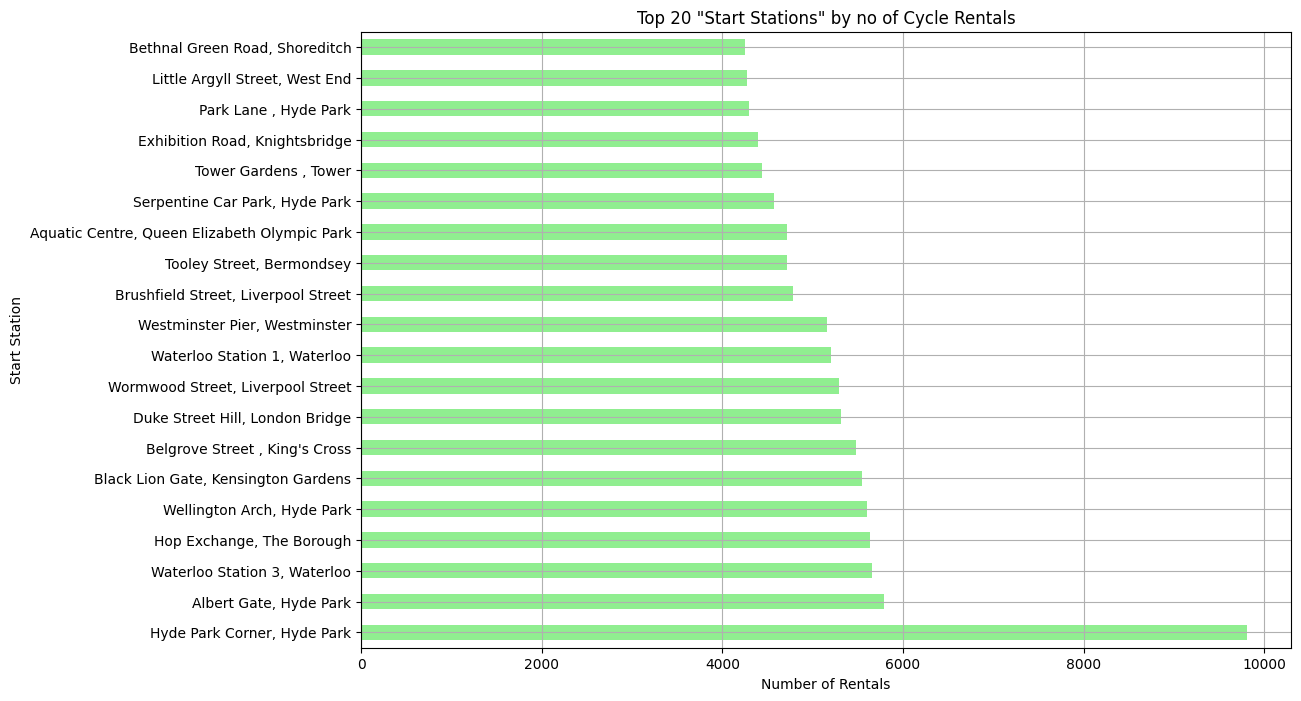

In [64]:
# plot Top 20 Start stations by number of highest cycle rentals

plt.figure(figsize = (12,8))

top20_start_stations.plot(kind = 'barh', color='lightgreen')
plt.title('Top 20 "Start Stations" by no of Cycle Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Start Station')
plt.grid(True)
plt.show()


We will now plot the Top 20 End stations by number of highest cycle rentals.

In [65]:
top20_end_stations = combined_cycle_rental_df['End station'].value_counts().head(20)

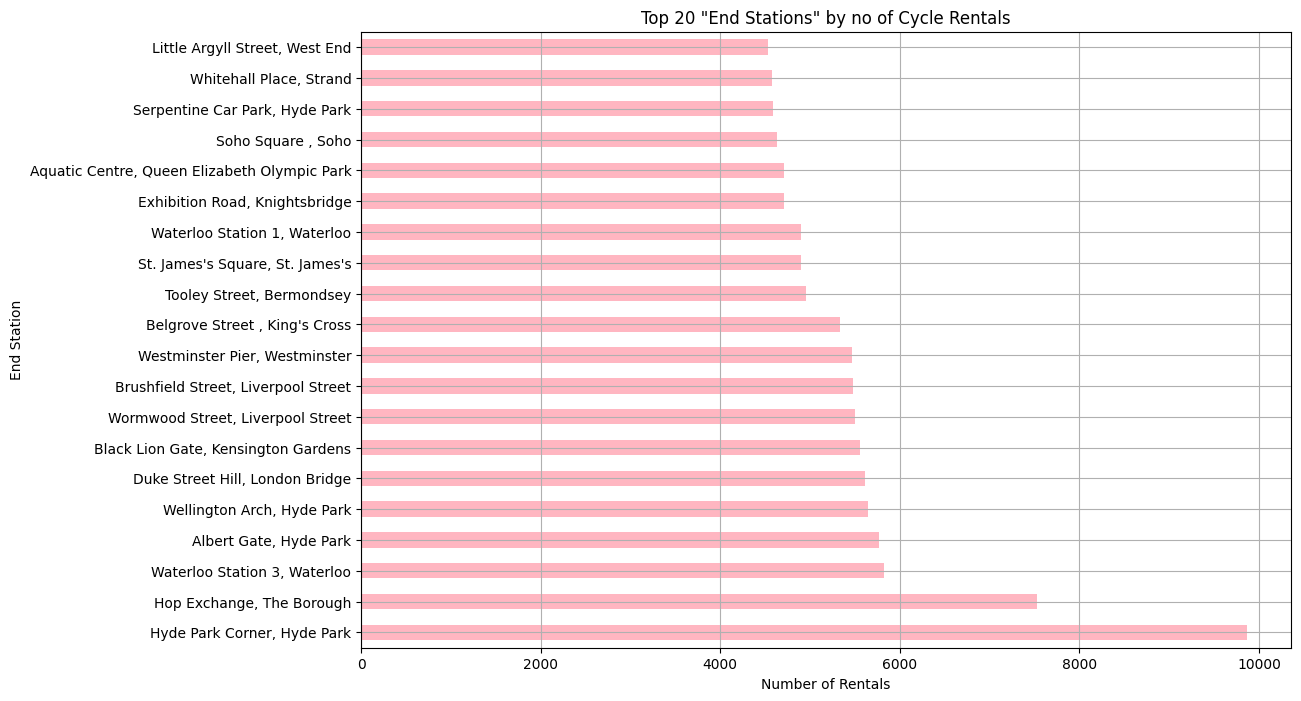

In [66]:
# plot Top 20 End stations by number of highest cycle rentals

plt.figure(figsize = (12,8))

top20_end_stations.plot(kind = 'barh', color='lightpink')
plt.title('Top 20 "End Stations" by no of Cycle Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('End Station')
plt.grid(True)
plt.show()


We are onto next set of questions below-

1.   Which hours have the highest rentals?
2.   Is it the busiest on a particular day of the week, or hours on a day, or on weekends?

To find these answers, we will do some time-series analysis of a period of weeks, days and hours for finding out any set patterns of rental trends.


In [67]:
# Split day of the week, hour of the day and week from the Start Data column

#Extract hour from day
combined_cycle_rental_df['Hour of the Day'] = combined_cycle_rental_df['Start date'].dt.hour

combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Encoded Start station,Encoded End station,Hour of the Day
0,104845857,240.0,16061,2021-01-05 21:56:00,747,"Ormonde Gate, Chelsea",2021-01-05 21:52:00,5,"Sedding Street, Sloane Square",NaN,630,520,21
1,104766166,1860.0,16293,2020-12-31 01:23:00,221,"Horseferry Road, Westminster",2020-12-31 00:52:00,811,"Westferry Circus, Canary Wharf",NaN,800,368,0
2,104825007,900.0,17264,2021-01-03 21:13:00,598,"Southerton Road, Hammersmith",2021-01-03 20:58:00,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN,637,666,20
3,104749300,360.0,18120,2020-12-30 08:55:00,201,"Dorset Square, Marylebone",2020-12-30 08:49:00,255,"Clifton Road, Maida Vale",NaN,169,212,8
4,104789206,1320.0,16336,2021-01-01 15:58:00,303,"Albert Gate, Hyde Park",2021-01-01 15:36:00,714,"Stewart's Road, Wandsworth Road",NaN,701,15,15


In [68]:
# Extract day from date
combined_cycle_rental_df['Day of the week'] = combined_cycle_rental_df['Start date'].dt.day_name()

combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Encoded Start station,Encoded End station,Hour of the Day,Day of the week
0,104845857,240.0,16061,2021-01-05 21:56:00,747,"Ormonde Gate, Chelsea",2021-01-05 21:52:00,5,"Sedding Street, Sloane Square",NaN,630,520,21,Tuesday
1,104766166,1860.0,16293,2020-12-31 01:23:00,221,"Horseferry Road, Westminster",2020-12-31 00:52:00,811,"Westferry Circus, Canary Wharf",NaN,800,368,0,Thursday
2,104825007,900.0,17264,2021-01-03 21:13:00,598,"Southerton Road, Hammersmith",2021-01-03 20:58:00,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN,637,666,20,Sunday
3,104749300,360.0,18120,2020-12-30 08:55:00,201,"Dorset Square, Marylebone",2020-12-30 08:49:00,255,"Clifton Road, Maida Vale",NaN,169,212,8,Wednesday
4,104789206,1320.0,16336,2021-01-01 15:58:00,303,"Albert Gate, Hyde Park",2021-01-01 15:36:00,714,"Stewart's Road, Wandsworth Road",NaN,701,15,15,Friday


In [69]:
#Extract week from date

combined_cycle_rental_df['Date of the Month'] = combined_cycle_rental_df['Start date'].dt.day

combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Encoded Start station,Encoded End station,Hour of the Day,Day of the week,Date of the Month
0,104845857,240.0,16061,2021-01-05 21:56:00,747,"Ormonde Gate, Chelsea",2021-01-05 21:52:00,5,"Sedding Street, Sloane Square",NaN,630,520,21,Tuesday,5
1,104766166,1860.0,16293,2020-12-31 01:23:00,221,"Horseferry Road, Westminster",2020-12-31 00:52:00,811,"Westferry Circus, Canary Wharf",NaN,800,368,0,Thursday,31
2,104825007,900.0,17264,2021-01-03 21:13:00,598,"Southerton Road, Hammersmith",2021-01-03 20:58:00,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN,637,666,20,Sunday,3
3,104749300,360.0,18120,2020-12-30 08:55:00,201,"Dorset Square, Marylebone",2020-12-30 08:49:00,255,"Clifton Road, Maida Vale",NaN,169,212,8,Wednesday,30
4,104789206,1320.0,16336,2021-01-01 15:58:00,303,"Albert Gate, Hyde Park",2021-01-01 15:36:00,714,"Stewart's Road, Wandsworth Road",NaN,701,15,15,Friday,1


Below steps are to check the range of unique Months and unique Date digits that we have in the dataset. This is done because I wanted to understand which dates are more significant than others, same for months.


In [70]:
# checking range of unique 'dates' in the dataset. Looks like we have all records only from these dates
combined_cycle_rental_df['Date of the Month'].unique()


array([ 5, 31,  3, 30,  1,  2,  4,  9,  7, 10, 11,  6, 12,  8, 19, 17, 16,
       13, 18, 15, 14, 22, 24, 21, 23, 20, 25, 26, 29, 28, 27],
      dtype=int32)

In [71]:
# Splitting by Month name, to see what all months we have in the dataset

combined_cycle_rental_df['Month'] = combined_cycle_rental_df['Start date'].dt.month_name()



In [72]:
# Doing this to see how many unique months in the dataset

combined_cycle_rental_df['Month'].unique()

array(['January', 'December', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [73]:
# As we have data for only Dec and Jan in the dataset, doing the below to see how many unique dates within these two months in the dataset.
#This will give an idea if we have enough data for further time-series analysis

combined_cycle_rental_df.loc[combined_cycle_rental_df['Month']=='December', 'Date of the Month'].unique()

array([31, 30,  3,  4,  5,  2,  6,  7,  1,  8,  9, 12, 13, 10, 14, 11, 21,
       17, 16, 20, 15, 18, 19, 25, 26, 27, 24, 23, 22, 28, 29],
      dtype=int32)

In [74]:
combined_cycle_rental_df.loc[combined_cycle_rental_df['Month']=='January', 'Date of the Month'].unique()

array([ 5,  3,  1,  2,  4,  9,  7, 10, 11,  6, 12,  8, 19, 17, 16, 13, 18,
       15, 14, 22, 24, 21, 23, 20, 25, 26, 31, 29, 28, 27, 30],
      dtype=int32)

## **Cycle Rental trend analysis - Hours/Week/Days**

We can start with the trend analysis on basis of the hours, weeks and day data that we have split from the entire START and END date columns previously.

In [75]:
#Analysing hourly trends

hourly_rentals = combined_cycle_rental_df.groupby(['Hour of the Day']).size()
hourly_rentals

Hour of the Day
0      15251
1      10111
2       6178
3       4418
4       3756
5       6226
6      23065
7      58790
8      98022
9      66973
10     56542
11     63857
12     76301
13     80237
14     79387
15     84856
16     95750
17    122378
18    119227
19     84217
20     55603
21     40926
22     34041
23     23888
dtype: int64

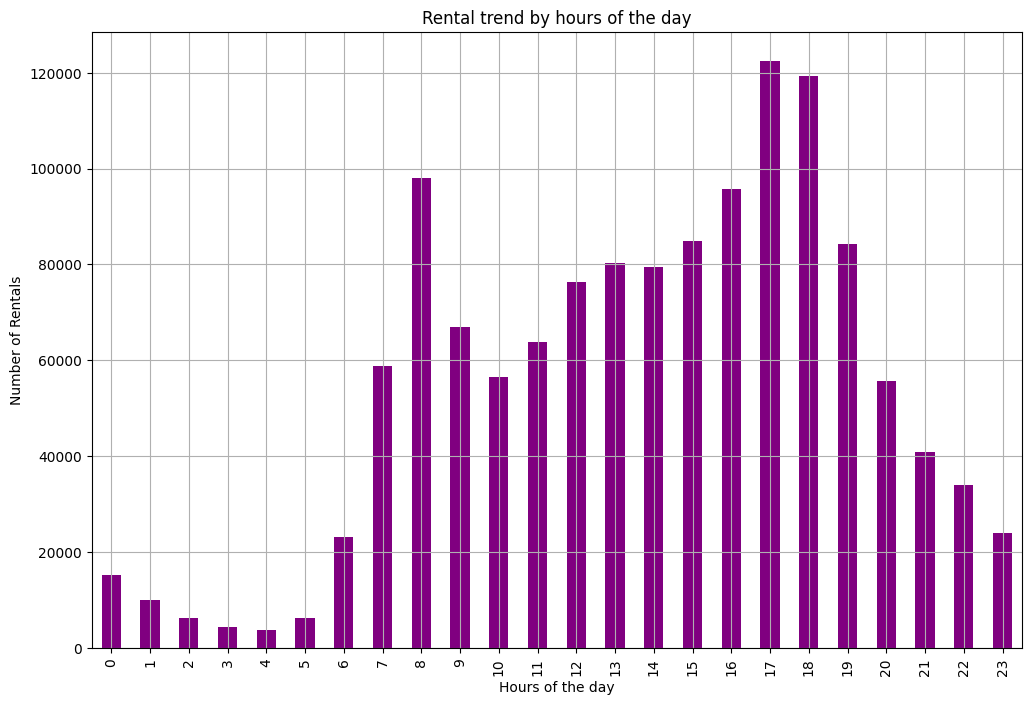

In [76]:
# Plot the hourly trends

plt.figure(figsize= (12, 8))
hourly_rentals.plot(kind = 'bar', color='purple')
plt.title('Rental trend by hours of the day')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

**It can be seen that the hours between 5-6pm are the busiest. This could be owing to the fact that there are people who return from their respective workplaces around this time, so its possible they take the bike route.**

We will analyse the rental trends as per days of the week now.

In [77]:
#quickly grabbing the dataset
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Encoded Start station,Encoded End station,Hour of the Day,Day of the week,Date of the Month,Month
0,104845857,240.0,16061,2021-01-05 21:56:00,747,"Ormonde Gate, Chelsea",2021-01-05 21:52:00,5,"Sedding Street, Sloane Square",NaN,630,520,21,Tuesday,5,January
1,104766166,1860.0,16293,2020-12-31 01:23:00,221,"Horseferry Road, Westminster",2020-12-31 00:52:00,811,"Westferry Circus, Canary Wharf",NaN,800,368,0,Thursday,31,December
2,104825007,900.0,17264,2021-01-03 21:13:00,598,"Southerton Road, Hammersmith",2021-01-03 20:58:00,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN,637,666,20,Sunday,3,January
3,104749300,360.0,18120,2020-12-30 08:55:00,201,"Dorset Square, Marylebone",2020-12-30 08:49:00,255,"Clifton Road, Maida Vale",NaN,169,212,8,Wednesday,30,December
4,104789206,1320.0,16336,2021-01-01 15:58:00,303,"Albert Gate, Hyde Park",2021-01-01 15:36:00,714,"Stewart's Road, Wandsworth Road",NaN,701,15,15,Friday,1,January


In [78]:
#Fetching the days of the week with highest rental numbers, in descending order

weekly_rentals_desc = combined_cycle_rental_df.groupby(['Day of the week']).size().sort_values(ascending = False)
weekly_rentals_desc

Day of the week
Thursday     198404
Wednesday    194941
Tuesday      194120
Saturday     193894
Friday       186947
Monday       174683
Sunday       167011
dtype: int64

**The above result shows that Thursdays are the busiest out of all 7 days for the given sample dataset.**

In [79]:
# Now fetching the days of the week with highest rental numbers, and resetting the index for plotting

weekly_rentals = combined_cycle_rental_df.groupby(['Day of the week']).size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekly_rentals


Day of the week
Monday       174683
Tuesday      194120
Wednesday    194941
Thursday     198404
Friday       186947
Saturday     193894
Sunday       167011
dtype: int64

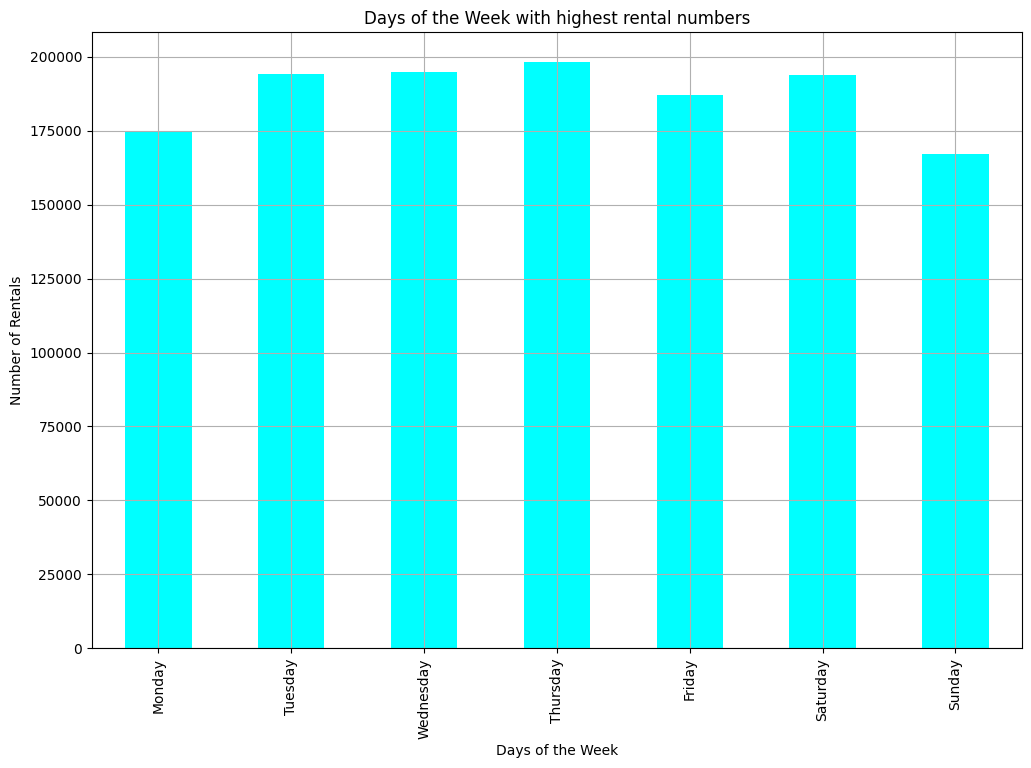

In [80]:
#Plotting the weekly rentals

plt.figure(figsize = (12, 8))
weekly_rentals.plot(kind='bar', color='cyan')
plt.title('Days of the Week with highest rental numbers')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

**Clearly, Thursday is the busiest day with highest number of cycle rentals in the entire week, followed by Wednesday, Tuesday and Saturday being almost at par.**

**The business might want to focus on Saturdays as its only logical because people go out on first weekend day and would prefer a more casual mode of transport such as cycles, if they are NOT in a hurry to reach somewhere.**

In [81]:
# Now fetching the DATES from the months that we have in the dataset. to understand, which month or which date in particular did better in terms of higher rentals.

monthly_rentals = combined_cycle_rental_df.groupby(['Month']).size() #.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
monthly_rentals

Month
April        127857
August        98981
December      91232
February     120856
January      132473
July          98182
June         121675
March        132834
May          132598
November      86051
October       88257
September     79004
dtype: int64

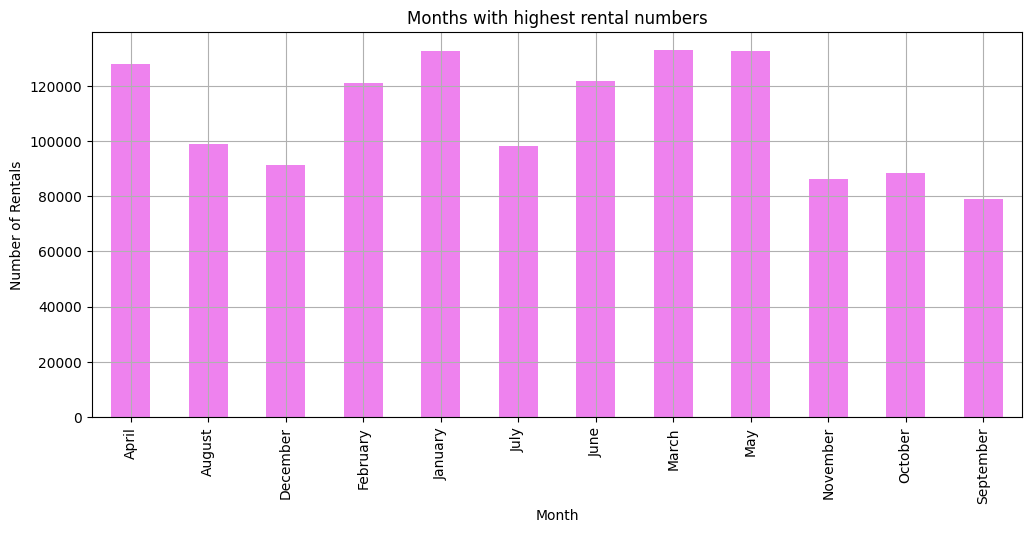

In [82]:
#Plot monthly rentals

plt.figure(figsize = (12, 5))
monthly_rentals.plot(kind='bar', color='violet')
plt.title('Months with highest rental numbers')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()




**The above bar plot shows that May leads the chart, followed by March, which is expected as these are the onset months of summer and spring, when the weather's not too bad or chilly for cycling.**

*The winter months from October-December are not so busy, however January shows surprisingly promising figures in terms of rentals as per this plot.*

In [83]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Encoded Start station,Encoded End station,Hour of the Day,Day of the week,Date of the Month,Month
0,104845857,240.0,16061,2021-01-05 21:56:00,747,"Ormonde Gate, Chelsea",2021-01-05 21:52:00,5,"Sedding Street, Sloane Square",NaN,630,520,21,Tuesday,5,January
1,104766166,1860.0,16293,2020-12-31 01:23:00,221,"Horseferry Road, Westminster",2020-12-31 00:52:00,811,"Westferry Circus, Canary Wharf",NaN,800,368,0,Thursday,31,December
2,104825007,900.0,17264,2021-01-03 21:13:00,598,"Southerton Road, Hammersmith",2021-01-03 20:58:00,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN,637,666,20,Sunday,3,January
3,104749300,360.0,18120,2020-12-30 08:55:00,201,"Dorset Square, Marylebone",2020-12-30 08:49:00,255,"Clifton Road, Maida Vale",NaN,169,212,8,Wednesday,30,December
4,104789206,1320.0,16336,2021-01-01 15:58:00,303,"Albert Gate, Hyde Park",2021-01-01 15:36:00,714,"Stewart's Road, Wandsworth Road",NaN,701,15,15,Friday,1,January


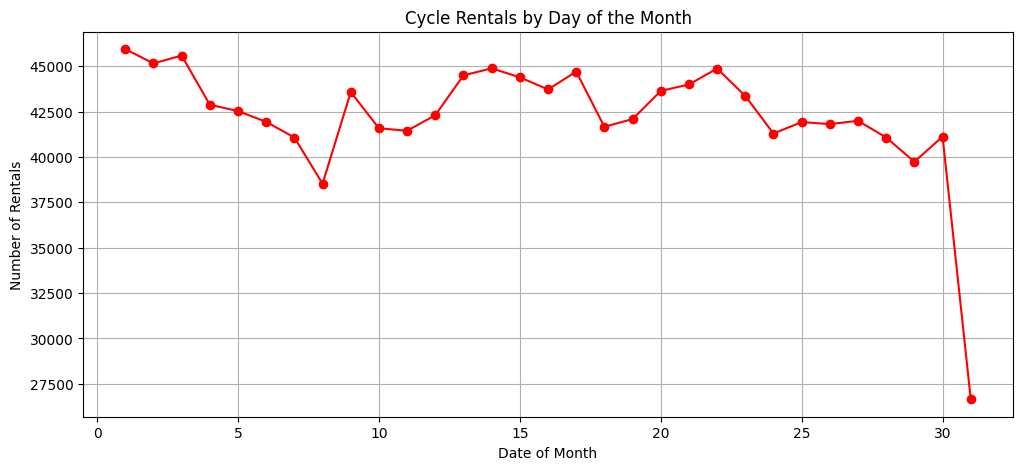

In [84]:
# Analyzing daily trends within the month

date_wise_rentals_per_month = combined_cycle_rental_df.groupby('Date of the Month').size()
plt.figure(figsize=(12, 5))
date_wise_rentals_per_month.plot(kind='line', marker='o', linestyle='-', color='red')
plt.title('Cycle Rentals by Day of the Month')
plt.xlabel('Date of Month')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

The above line plot shows that the rentals are looming the highest at the start of the month, are stable througout the middle of the month, and then dipping towards the end of the month.

This throws some light on the user behaviour that people tend to be more enthusiastic about cycling at the beginning of the month, similar to the New Year resolution psychology.

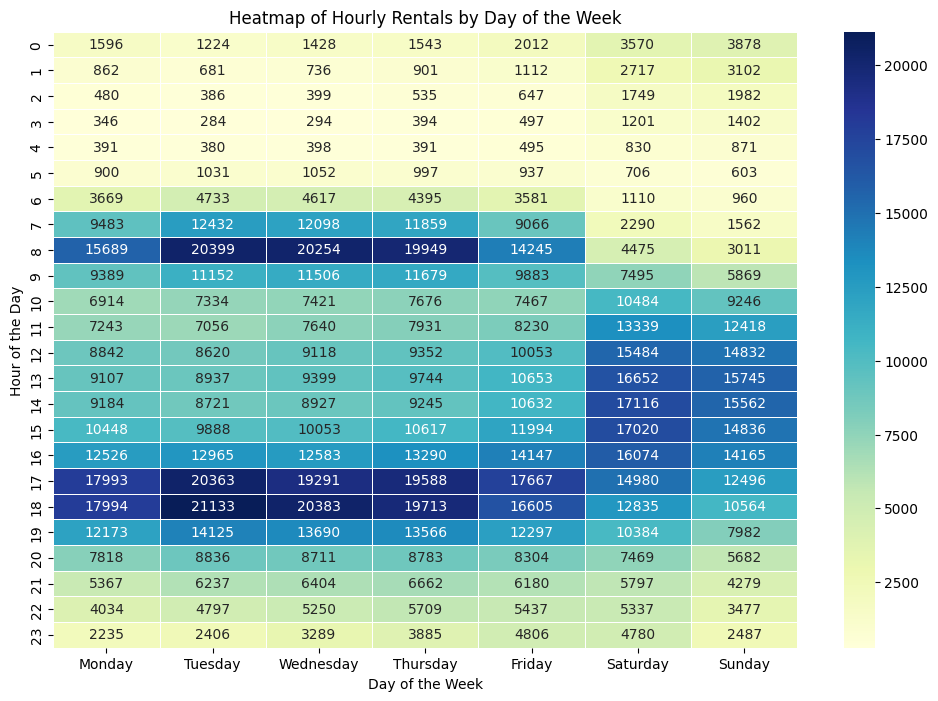

In [85]:
# Heatmap of Hourly Rentals by Day of the Week
pivot_table = combined_cycle_rental_df.pivot_table(index='Hour of the Day', columns='Day of the week', values='Number', aggfunc='count')
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True, fmt=".0f")
plt.title('Heatmap of Hourly Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

**The given Heatmap analyzes the hourly rental trends by 'Day of the Week. The color paletter shifts from light to dark, which means smaller value to a larger value.**

The darkest color palette is for days **Tues, Wed, Thurs, for Hours 8am, and then from 5-6pm**.*These are the office hours for most people, which could indicate that most bike users are office goers OR the people who travel by bikes during these hours to avoid the office peak hour rush.*

<ipython-input-86-02d05f9dccf1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bike_model_counts.index, y=bike_model_counts.values, palette="viridis")


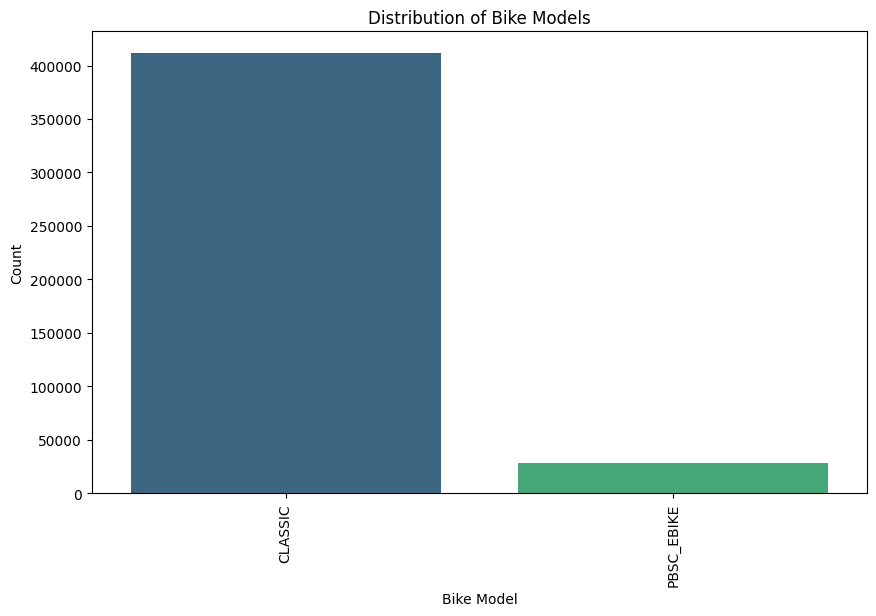

In [86]:
# Count the occurrences of each bike model
bike_model_counts = combined_cycle_rental_df['Bike model'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=bike_model_counts.index, y=bike_model_counts.values, palette="viridis")
plt.title('Distribution of Bike Models')
plt.xlabel('Bike Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**The above plot shows that maximum bikes belong to the Bike model = CLASSIC, with very few in the e-bike category. There is a fair scope here for the business to expand into the 'PBSC_BIKE' segment which is an electronic-bike, this helping with speed and an improved user experience**

# **Station popularity analysis**

We will now analyze the patterns in the usage of the stations and try to identify any relevant factors that might influence station popularity.

Few things we can analyse here are-

1. No of trips starting from each station
2. No of trips ending at each station
3. Calculate total activity at each station (by merging start and end trips)
4. Find out the most popular and least popular stations in terms of highest activity
5. Visualize the findings

In [87]:
# No of trips starting from each station

start_station_total_trips = combined_cycle_rental_df['Start station'].value_counts().reset_index()
start_station_total_trips.columns = ['Start Station','Total Start trips']
start_station_total_trips.head()

,Start Station,Total Start trips
0,"Hyde Park Corner, Hyde Park",9807
1,"Albert Gate, Hyde Park",5790
2,"Waterloo Station 3, Waterloo",5661
3,"Hop Exchange, The Borough",5632
4,"Wellington Arch, Hyde Park",5597


In [88]:
# No of trips Ending at each station

end_station_total_trips = combined_cycle_rental_df['End station'].value_counts().reset_index()
end_station_total_trips.columns = ['End Station','Total End trips']
end_station_total_trips.head()

,End Station,Total End trips
0,"Hyde Park Corner, Hyde Park",9866
1,"Hop Exchange, The Borough",7526
2,"Waterloo Station 3, Waterloo",5824
3,"Albert Gate, Hyde Park",5766
4,"Wellington Arch, Hyde Park",5644


**This shows that- ['Hyde Park Corner, Hyde Park',
'Albert Gate, Hyde Park',
'Hop Exchange, The Borough',
'Waterloo Station 3, Waterloo',
'Wellington Arch, Hyde Park']
are one of the most active stations in terms of both pick-up and drop-off of the cycles.**

In [89]:
# We will merge the START and END counts for each station to get a full picture of the station activity

station_activity = pd.merge(start_station_total_trips, end_station_total_trips, left_on = 'Start Station', right_on = 'End Station', how = 'outer')
station_activity.fillna(0, inplace=True)
station_activity

,Start Station,Total Start trips,End Station,Total End trips
0,"Hyde Park Corner, Hyde Park",9807.0,"Hyde Park Corner, Hyde Park",9866.0
1,"Albert Gate, Hyde Park",5790.0,"Albert Gate, Hyde Park",5766.0
2,"Waterloo Station 3, Waterloo",5661.0,"Waterloo Station 3, Waterloo",5824.0
3,"Hop Exchange, The Borough",5632.0,"Hop Exchange, The Borough",7526.0
4,"Wellington Arch, Hyde Park",5597.0,"Wellington Arch, Hyde Park",5644.0
...,...,...,...,...
822,"Hardwick Street, Clerkenwell_old2",2.0,0,0.0
823,Pop Up Dock 1,1.0,Pop Up Dock 1,1.0
824,0,0.0,Mechanical Workshop Clapham,7.0
825,0,0.0,Mechanical Workshop Penton,6.0


In [90]:
# Calculate total activity at each station (summation of both START and END station activities)


station_activity['Total trips (Start+End) per Station'] = station_activity['Total Start trips'] + station_activity['Total End trips']
station_activity

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",9807.0,"Hyde Park Corner, Hyde Park",9866.0,19673.0
1,"Albert Gate, Hyde Park",5790.0,"Albert Gate, Hyde Park",5766.0,11556.0
2,"Waterloo Station 3, Waterloo",5661.0,"Waterloo Station 3, Waterloo",5824.0,11485.0
3,"Hop Exchange, The Borough",5632.0,"Hop Exchange, The Borough",7526.0,13158.0
4,"Wellington Arch, Hyde Park",5597.0,"Wellington Arch, Hyde Park",5644.0,11241.0
...,...,...,...,...,...
822,"Hardwick Street, Clerkenwell_old2",2.0,0,0.0,2.0
823,Pop Up Dock 1,1.0,Pop Up Dock 1,1.0,2.0
824,0,0.0,Mechanical Workshop Clapham,7.0,7.0
825,0,0.0,Mechanical Workshop Penton,6.0,6.0


In [91]:
#Sort the station list in descending to find the most popular and least popular stations by total count of trips

station_activity.sort_values(by='Total trips (Start+End) per Station', ascending = False, inplace=True)
station_activity

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",9807.0,"Hyde Park Corner, Hyde Park",9866.0,19673.0
3,"Hop Exchange, The Borough",5632.0,"Hop Exchange, The Borough",7526.0,13158.0
1,"Albert Gate, Hyde Park",5790.0,"Albert Gate, Hyde Park",5766.0,11556.0
2,"Waterloo Station 3, Waterloo",5661.0,"Waterloo Station 3, Waterloo",5824.0,11485.0
4,"Wellington Arch, Hyde Park",5597.0,"Wellington Arch, Hyde Park",5644.0,11241.0
...,...,...,...,...,...
824,0,0.0,Mechanical Workshop Clapham,7.0,7.0
825,0,0.0,Mechanical Workshop Penton,6.0,6.0
822,"Hardwick Street, Clerkenwell_old2",2.0,0,0.0,2.0
823,Pop Up Dock 1,1.0,Pop Up Dock 1,1.0,2.0


**The above data shows that 'Hyde Park Corner, Hyde Park' is the topmost popular and active station for both pick-up and drop-off. On the other hand 'Stockwell Roundabout, Stockwell' is the least active station with a very few trips count**

In [92]:
# Fetch the most popular station in terms of highest total trips

station_activity.head(1)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",9807.0,"Hyde Park Corner, Hyde Park",9866.0,19673.0


In [93]:
# Fetch the TOP 10 most popular stations in terms of highest total trips

station_activity.head(10)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
0,"Hyde Park Corner, Hyde Park",9807.0,"Hyde Park Corner, Hyde Park",9866.0,19673.0
3,"Hop Exchange, The Borough",5632.0,"Hop Exchange, The Borough",7526.0,13158.0
1,"Albert Gate, Hyde Park",5790.0,"Albert Gate, Hyde Park",5766.0,11556.0
2,"Waterloo Station 3, Waterloo",5661.0,"Waterloo Station 3, Waterloo",5824.0,11485.0
4,"Wellington Arch, Hyde Park",5597.0,"Wellington Arch, Hyde Park",5644.0,11241.0
5,"Black Lion Gate, Kensington Gardens",5548.0,"Black Lion Gate, Kensington Gardens",5561.0,11109.0
7,"Duke Street Hill, London Bridge",5313.0,"Duke Street Hill, London Bridge",5614.0,10927.0
6,"Belgrove Street , King's Cross",5476.0,"Belgrove Street , King's Cross",5330.0,10806.0
8,"Wormwood Street, Liverpool Street",5293.0,"Wormwood Street, Liverpool Street",5505.0,10798.0
10,"Westminster Pier, Westminster",5160.0,"Westminster Pier, Westminster",5473.0,10633.0


In [94]:
# Fetch the least popular station in terms of least total trips

station_activity.tail(1)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
826,0,0.0,"Stockwell Roundabout, Stockwell",1.0,1.0


In [95]:
# Fetch the BOTTOM 10 least popular stations in terms of least total trips

station_activity.tail(10)

,Start Station,Total Start trips,End Station,Total End trips,Total trips (Start+End) per Station
818,"Lansdown Drive, Hackney Central",28.0,"Lansdown Drive, Hackney Central",32.0,60.0
817,"Oval Way, Vauxhall",32.0,"Oval Way, Vauxhall",21.0,53.0
819,"Paddington Green Police Station, Paddington",21.0,"Paddington Green Police Station, Paddington",17.0,38.0
820,"Disraeli Road, Putney2",8.0,"Disraeli Road, Putney2",11.0,19.0
821,"Cartier Circle, Canary Wharf",4.0,"Cartier Circle, Canary Wharf",3.0,7.0
824,0,0.0,Mechanical Workshop Clapham,7.0,7.0
825,0,0.0,Mechanical Workshop Penton,6.0,6.0
822,"Hardwick Street, Clerkenwell_old2",2.0,0,0.0,2.0
823,Pop Up Dock 1,1.0,Pop Up Dock 1,1.0,2.0
826,0,0.0,"Stockwell Roundabout, Stockwell",1.0,1.0


In [96]:
#Rename the 'Total trips (Start+End) per Station' column

station_activity.rename(columns = {'Total trips (Start+End) per Station': 'Total trips'}, inplace=True)
station_activity
#station_activity.head()

,Start Station,Total Start trips,End Station,Total End trips,Total trips
0,"Hyde Park Corner, Hyde Park",9807.0,"Hyde Park Corner, Hyde Park",9866.0,19673.0
3,"Hop Exchange, The Borough",5632.0,"Hop Exchange, The Borough",7526.0,13158.0
1,"Albert Gate, Hyde Park",5790.0,"Albert Gate, Hyde Park",5766.0,11556.0
2,"Waterloo Station 3, Waterloo",5661.0,"Waterloo Station 3, Waterloo",5824.0,11485.0
4,"Wellington Arch, Hyde Park",5597.0,"Wellington Arch, Hyde Park",5644.0,11241.0
...,...,...,...,...,...
824,0,0.0,Mechanical Workshop Clapham,7.0,7.0
825,0,0.0,Mechanical Workshop Penton,6.0,6.0
822,"Hardwick Street, Clerkenwell_old2",2.0,0,0.0,2.0
823,Pop Up Dock 1,1.0,Pop Up Dock 1,1.0,2.0


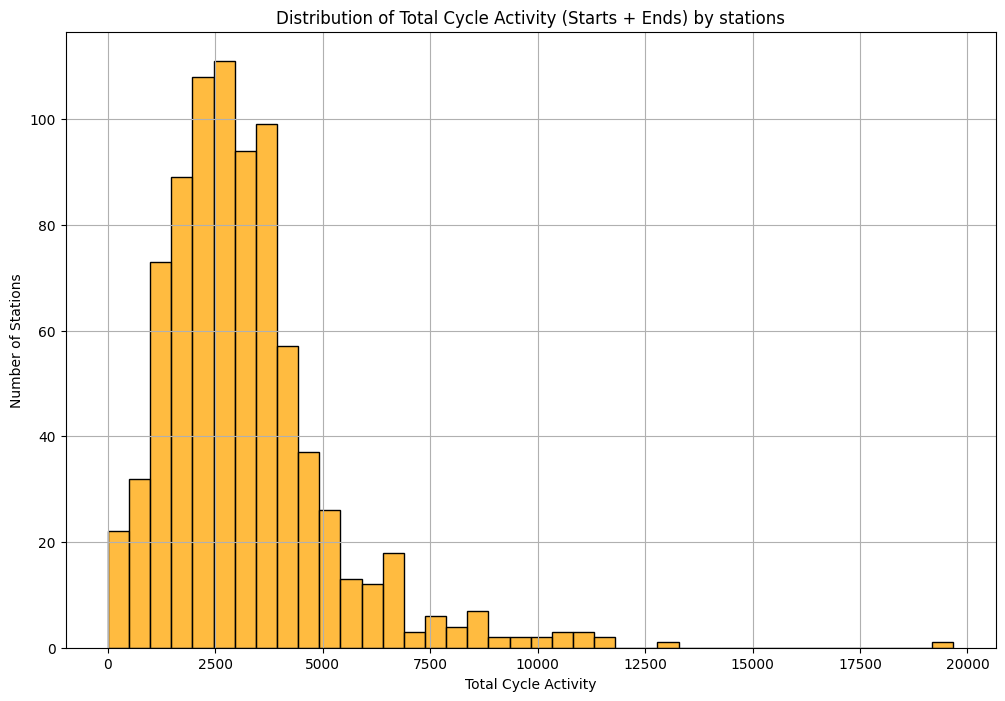

In [97]:
#Let's see the distribution of station activity

plt.figure(figsize=(12, 8))
sns.histplot(station_activity['Total trips'], bins=40, kde=False, color='orange')
plt.title('Distribution of Total Cycle Activity (Starts + Ends) by stations')
plt.xlabel('Total Cycle Activity')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()

**The above plot is *almost* a Normal distribution with the tail skewing to the right, which means that most of the data is centered around the average number of trips, which is around 2500.**

# **Behavioural analysis**

For our dataset, its not possible to directly perform any specific user behaviour analysis due to the lack of any user information, loyalty or membership columns.

However, using the 'Bike number' and 'Bike model' columns in the dataset, its possible to uncover some user behavior depending on frequency of bike usage patterns. This could provide some insights on users who are frequent bike renters.

In [98]:
# Analyzing bike usage frequency to infer potential user behavior

cycle_usage_freq = combined_cycle_rental_df['Bike number'].value_counts().reset_index()
cycle_usage_freq.columns = ['Bike number','Usage Count']
cycle_usage_freq.head()

,Bike number,Usage Count
0,19003,183
1,20073,168
2,20198,168
3,20161,162
4,20121,160


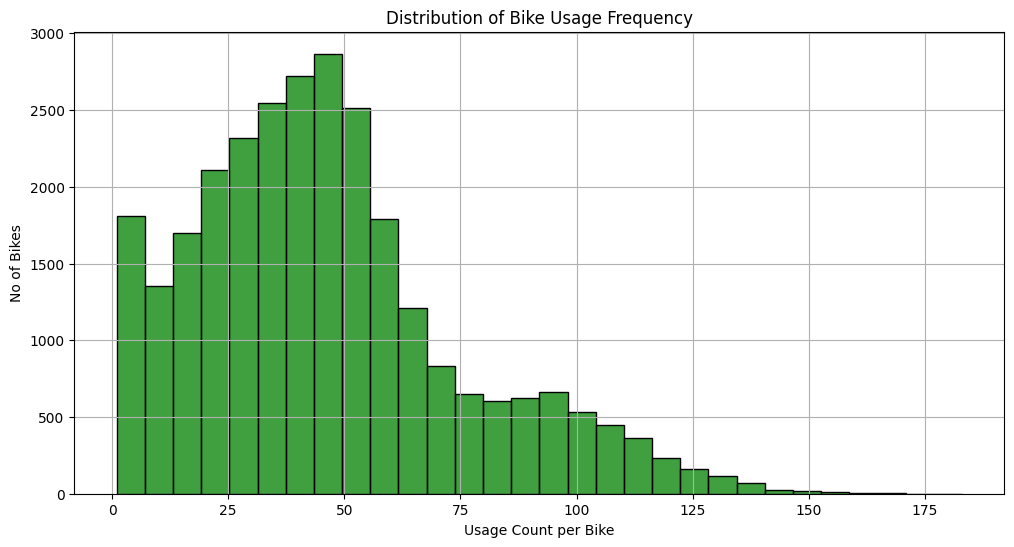

In [99]:
# Displaying the distribution of bike usage as per count

plt.figure(figsize = (12, 6))
sns.histplot(cycle_usage_freq['Usage Count'], bins=30, kde=False, color='green')
plt.title('Distribution of Bike Usage Frequency')
plt.xlabel('Usage Count per Bike')
plt.ylabel('No of Bikes')
plt.grid(True)
plt.show()

In [100]:
# Identifying the most used bikes

print("Top 10 Most Used Bikes:")
cycle_usage_freq.head(10)


Top 10 Most Used Bikes:


,Bike number,Usage Count
0,19003,183
1,20073,168
2,20198,168
3,20161,162
4,20121,160
5,18172,159
6,20151,159
7,17750,158
8,20141,158
9,19541,158


In [101]:
# Identifying the least used bikes

print("\nTop 10 Least Used Bikes:")
cycle_usage_freq.tail(10)


Top 10 Least Used Bikes:


,Bike number,Usage Count
28283,4791,1
28284,5358,1
28285,35550,1
28286,6246,1
28287,35265,1
28288,4862,1
28289,2523,1
28290,10753,1
28291,53168,1
28292,53608,1


**Below code to analyze user behavior from operational strategy perspective-**

In [102]:
# Below to analyse if certain bikes are predominantly used at specific stations or times
# This can give an idea of target user preferences from operational strategy perspective

cycle_start_station_usage = combined_cycle_rental_df.groupby(['Bike number', 'Start station']).size().reset_index(name='Count')
most_used_cycles_at_start_station = cycle_usage_freq.head(10)['Bike number']



In [103]:
cycle_start_station_usage.head()

,Bike number,Start station,Count
0,1,"Abbey Orchard Street, Westminster",1
1,1,"Albany Street, The Regent's Park",1
2,1,"Aquatic Centre, Queen Elizabeth Olympic Park",1
3,1,"Ashley Place, Victoria",1
4,1,"Battersea Park Road, Nine Elms",1


In [104]:
most_used_cycles_at_start_station

0    19003
1    20073
2    20198
3    20161
4    20121
5    18172
6    20151
7    17750
8    20141
9    19541
Name: Bike number, dtype: int64

**Using the list containing most frequently used bikes, we can now find out which stations are most preferred stations for most-used cycles.**

In [105]:
for bike in most_used_cycles_at_start_station:
  start_station_specific_cycle_stats = cycle_start_station_usage[cycle_start_station_usage['Bike number']==bike]
  top_5_start_station = start_station_specific_cycle_stats.sort_values(by='Count', ascending=False).head()
  print(top_5_start_station)


        Bike number                      Start station  Count
608096        19003             Albert Gate, Hyde Park      3
608138        19003     Exhibition Road, Knightsbridge      3
608238        19003       Waterloo Station 1, Waterloo      3
608151        19003                   Furze Green, Bow      3
608094        19003  Abbey Orchard Street, Westminster      2
        Bike number                                Start station  Count
702892        20073               Exhibition Road, Knightsbridge      5
702992        20073                Westminster Pier, Westminster      3
702954        20073                         Queen Street 1, Bank      3
702893        20073                         Felsham Road, Putney      2
702946        20073  Park Road (Baker Street), The Regent's Park      2
        Bike number                 Start station  Count
714970        20198       Tower Wharf, Bermondsey      3
714902        20198     Hop Exchange, The Borough      3
714965        20198      

# **Model Building phase**

Now we will proceed with building a Random Forest regressor model to extract more insights for a successful cycle rental business and for further recommendations.

In [106]:
#import necessary libraries for ML model building

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

A machine learning algorithm doesn't understand non-numeric language. So prior to model building, we will need to convert all categorical features into numerical values, also known as 'one-hot encoding' technique.

In [107]:
combined_cycle_rental_df.head()

,Number,Total duration (s),Bike number,End date,End station number,End station,Start date,Start station number,Start station,Bike model,Encoded Start station,Encoded End station,Hour of the Day,Day of the week,Date of the Month,Month
0,104845857,240.0,16061,2021-01-05 21:56:00,747,"Ormonde Gate, Chelsea",2021-01-05 21:52:00,5,"Sedding Street, Sloane Square",NaN,630,520,21,Tuesday,5,January
1,104766166,1860.0,16293,2020-12-31 01:23:00,221,"Horseferry Road, Westminster",2020-12-31 00:52:00,811,"Westferry Circus, Canary Wharf",NaN,800,368,0,Thursday,31,December
2,104825007,900.0,17264,2021-01-03 21:13:00,598,"Southerton Road, Hammersmith",2021-01-03 20:58:00,667,"Shepherd's Bush Road North, Shepherd's Bush",NaN,637,666,20,Sunday,3,January
3,104749300,360.0,18120,2020-12-30 08:55:00,201,"Dorset Square, Marylebone",2020-12-30 08:49:00,255,"Clifton Road, Maida Vale",NaN,169,212,8,Wednesday,30,December
4,104789206,1320.0,16336,2021-01-01 15:58:00,303,"Albert Gate, Hyde Park",2021-01-01 15:36:00,714,"Stewart's Road, Wandsworth Road",NaN,701,15,15,Friday,1,January


In [108]:
# Encode categorical variables
label_encoder = LabelEncoder()


combined_cycle_rental_df['Encoded Start station'] = label_encoder.fit_transform(combined_cycle_rental_df['Start station'])
combined_cycle_rental_df['Encoded End station'] = label_encoder.fit_transform(combined_cycle_rental_df['End station'])
combined_cycle_rental_df['Encoded Day of Week'] = label_encoder.fit_transform(combined_cycle_rental_df['Day of the week'])
combined_cycle_rental_df['Encoded Month'] = label_encoder.fit_transform(combined_cycle_rental_df['Month'])


# Feature Engineering

In this phase, we will define relevant features from the dataset, and a target variable - which will be the output by the built model.


In [109]:
features = ['Encoded Start station', 'Encoded End station', 'Hour of the Day', 'Date of the Month', 'Encoded Day of Week', 'Encoded Month']

target = 'Total duration (s)'


In [110]:
#Split data into Training and Testing in 80/20 % ratio

X_train, X_test, y_train, y_test = train_test_split(combined_cycle_rental_df[features], combined_cycle_rental_df[target], test_size = 0.2, random_state = 42)

# Choosing a model type - Random Forest Regressor

In [3]:
# Choosing  RandomForestRegressor

randomforest_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model.fit(X_train, y_train)

In [4]:
# Predict on the test dataset

y_pred = randomforest_model.predict(X_test)


# **Model Evaluation**

Its now time for evaluating the model performance. Mean Squared Error (MSE) and R-Squared error (R²)  is one of the best evaluation metrics for regression problems such as this one.

In [ ]:
# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 42538598.27588602
R² Score: -0.05730202592496436


In [ ]:
# Evaluate additional metrics for the Random Forest model

from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1096.9864308921956
